### Setup

This notebook explains how to to access the dataset models from django.
The datasets are loaded from the Postgres database into pandas dataframes.

To start the notebook server:

```
# Start a bash shell inside the api container
docker-compose exec api /bin/bash

# Start the jupyter notebook
python manage.py shell_plus --notebook

# Take note of the token provided and access the notebook through:
<ip-of-the-machine>:7777/?<token>
http://127.0.0.1:7777/?token=30c43675981e671b4a609cff470819098e274bbde415b7f5
```

This step has only to be made once as long as the jupyter-notebook keeps executing.
Considering that the the notebook continues to run, you can access the notebook using:
``` 
<ip-of-the-machine>:7777/?<token>
```

In [1]:
# Required to access the database
import os
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

# Data analysis tools
import pandas as pd
import numpy as np
import seaborn as sns

# Models available in our application
from datasets.models import RawFlower, RawUNM, RawDAR
from django.contrib.auth.models import User

In [2]:
from api import adapters
from api import analysis

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
from datasets.models import RawNEU
df = pd.DataFrame.from_records(
        RawNEU.objects.
        # exclude(Creat_Corr_Result__lt=-1000).
        # exclude(Creat_Corr_Result__isnull=True).
        values()
    )


#adapters.neu.get_dataframe()

# Get Dataframes

In [4]:
##commented out for testing purposes
neu_df = adapters.neu.get_dataframe()
unm_df = adapters.unm.get_dataframe_orig()

#just for testing the size, we generate some random data
generate_randoms= ['UPB', 'UPT', 'USB', 'USE', 'USN', 'UTAS', 'UTL', 'UTU', 'UUR', 'UVA',
       'UZN'] + ['UHG', 'UBA', 'UCO', 'UCS', 'UBE', 'UCD', 'UMO', 'UMN']

#numpy has random number generators which are pretty good
for analyte in generate_randoms:
    unm_df[analyte] = np.random.exponential(scale = 1.0, size = unm_df.shape[0])

##DELETE once have real dar data
dar_df=unm_df

##UNCOMMENT once have real dar data
"""df3 = adapters.dar.get_dataframe()"""


(570, 50)
(543, 10)
Model out 543. afterocnf 543. check ids 543


'df3 = adapters.dar.get_dataframe()'

In [5]:


#plt.plot(np.random.exponential(scale=1.0, size=200))

In [6]:
neu_df.columns


Index(['PIN_Patient', 'TimePeriod', 'Member_c', 'Outcome', 'Outcome_weeks',
       'age', 'ethnicity', 'race', 'BMI', 'smoking', 'parity',
       'preg_complications', 'folic_acid_supp', 'fish', 'babySex', 'birthWt',
       'birthLen', 'headCirc', 'WeightCentile', 'LGA', 'SGA', 'ga_collection',
       'education', 'birth_year', 'SPECIFICGRAVITY_V2_x', 'fish_pu_v2', 'UBA',
       'UBE', 'UCD', 'UCO', 'UCR', 'UCS', 'UCU', 'UHG', 'UMN', 'UMO', 'UNI',
       'UPB', 'UPT', 'USB', 'USE', 'USN', 'UTAS', 'UTL', 'UTU', 'UUR', 'UVA',
       'UZN', 'CohortType', 'original', 'prediction', 'prediction_xvalue',
       'original_xvalue', 'SPECIFICGRAVITY_V2_y', 'zscore', 'UDR', 'Cohort',
       'dil_indicator'],
      dtype='object')

In [7]:
generate_randoms= ['UPB', 'UPT', 'USB', 'USE', 'USN', 'UTAS', 'UTL', 'UTU', 'UUR', 'UVA',
       'UZN'] + ['UHG', 'UBA', 'UCO', 'UCS', 'UBE', 'UCD', 'UMO', 'UMN']

for analyte in generate_randoms:
    unm_df[analyte] = np.random.exponential(scale = 1.0, size = unm_df.shape[0])

In [8]:
unm_df.columns

Index(['PIN_Patient', 'TimePeriod', 'Member_c', 'Outcome', 'Outcome_weeks',
       'age', 'ethnicity', 'race', 'education', 'BMI', 'income', 'smoking',
       'parity', 'preg_complications', 'folic_acid_supp', 'fish', 'babySex',
       'birthWt', 'headCirc', 'birthLen', 'WeightCentile', 'LGA', 'SGA',
       'ga_collection', 'birth_year', 'UAS3', 'UAS5', 'UASB', 'UASC', 'UDMA',
       'UMMA', 'UPB', 'UTAS', 'CohortType', 'UPT', 'USB', 'USE', 'USN', 'UTL',
       'UTU', 'UUR', 'UVA', 'UZN', 'UHG', 'UBA', 'UCO', 'UCS', 'UBE', 'UCD',
       'UMO', 'UMN'],
      dtype='object', name='Analyte')

In [9]:
example_cols = ['Member_c', 'TimePeriod', 
                   'sample_gestage_days', 'Outcome', 
                   'age','ethnicity','race','education','BMI',
                   'smoking','parity', 'preg_complications',
                   'folic_acid_supp','babySex',
                   'birthWt','birthLen','headCirc','ponderal','PNFFQTUNA',
                   'PNFFQFR_FISH_KIDS','PNFFQSHRIMP_CKD','PNFFQDK_FISH','PNFFQOTH_FISH',
                   'mfsp_6','fish','TOTALFISH_SERV','UIAS', 'UASB', 'UAS3', 'UAS5','UHG','UAS']



### Find Common Variables Across 3 Cohorts

In [10]:
##importing all NEU raw, categorical variables
CAT_NEU_ANALYTES = (
    # Urine
    ('USB', 'Antimony - Urine'),
    ('UTAS', 'Arsenic - Urine'),
    ('UBA', 'Barium - Urine'),
    ('UBE', 'Beryllium - Urine'),
    ('UCD', 'Cadmium - Urine'),
    ('UCS', 'Cesium - Urine'),
    ('UCR', 'Chromium - Urine'),
    ('UCO', 'Cobalt - Urine'),
    ('UCU', 'Copper - Urine'),
    ('UPB', 'Lead - Urine'),
    ('UMN', 'Manganese - Urine'),
    ('UHG', 'Mercury - Urine'),
    ('UMO', 'Molybdenum - Urine'),
    ('UNI', 'Nickel - Urine'),
    ('UPT', 'Platinum - Urine'),
    ('USE', 'Selenium - Urine'),
    ('UTL', 'Thallium - Urine'),
    ('USN', 'Tin - Urine'),
    ('UTU', 'Tungsten - Urine'),
    ('UUR', 'Uranium - Urine'),
    ('UVA', 'Vanadium - Urine'),
    ('UZN', 'Zinc - Urine'),
    # Blood
    ('BSB', 'Antimony - Blood'),
    ('BTAS', 'Arsenic - Blood'),
    ('BAL', 'Aluminum - Blood'),
    ('BBE', 'Beryllium - Blood'),
    ('BBA', 'Barium - Blood'),
    ('BCD', 'Cadmium - Blood'),
    ('BCS', 'Cesium - Blood'),
    ('BCO', 'Cobalt - Blood'),
    ('BCU', 'Copper - Blood'),
    ('BCR', 'Chromium - Blood'),
    ('BFE', 'Iron - Blood'),
    ('BPB', 'Lead - Blood'),
    ('BPB2', 'Lead (208) - Blood'),
    ('BMB', 'Manganese - Blood'),
    ('BHG', 'Mercury - Blood'),
    ('BMO', 'Molybdenum - Blood'),
    ('BNI', 'Nickel - Blood'),
    ('BPT', 'Platinum - Blood'),
    ('BTL', 'Thallium - Blood'),
    ('BTU', 'Tungsten - Blood'),
    ('BUR', 'Uranium - Blood'),
    ('BVA', 'Vanadium - Blood'),
    ('BSE', 'Selenium - Blood'),
    ('BSEG', 'Selenium+G1124 - Blood'),
    ('BSN', 'Tin - Blood'),
    ('BZN', 'Zinc - Blood'),
    #     'triclosan - Urine',
    #     'Butyl Paraben - Urine',
    #     'bisphenol F - Urine',
    #     'bisphenol S - Urine',
    #     '2 4-dichlorophenol - Urine',
    #     'bisphenol A - Urine',
    #     'Ethyl Paraben - Urine',
    #     '2 5-dichlorophenol - Urine',
    #     'Propyl Paraben - Urine',
    #     'triclocarban - Urine',
    #     'Methyl Paraben - Urine',
    #     'benzophenone-3 - Urine',
    #     'Cyclohexane-1 2-dicarboxylic acid monohydroxy isononyl ester - Urine',
    #     'cyclohexane-1 2-dicarboxylic acid monocarboxyisooctyl ester - Urine',
    #     'Mono-isononyl phthalate - Urine',
    #     'Mono carboxyisononyl phthalate - Urine',
    #     'Mono-3-carboxypropyl phthalate - Urine',
    #     'mono-2-ethyl-5-hydrohexyl terephthalate - Urine',
    #     'Monooxononyl phthalate - Urine',
    #     'Mono-hydroxybutyl phthalate - Urine',
    #     'Monobenzyl phthalate - Urine',
    #     'Mono-2-ethylhexyl phthalate - Urine',
    #     'Mono-hydroxyisobutyl phthalate - Urine',
    #     'Mono carboxyisooctyl phthalate - Urine',
    #     'mono-2-ethyl-5-carboxypentyl terephthalate - Urine',
    #     'Mono-2-ethyl-5-oxohexyl phthalate - Urine',
    #     'Mono-2-ethyl-5-hydroxyhexyl phthalate - Urine',
    #     'Mono-2-ethyl-5-carboxypentyl phthalate - Urine',
    #     'Mono-isobutyl phthalate - Urine',
    #     'Mono-n-butyl phthalate - Urine',
    #     'Monoethyl phthalate - Urine',
    #     'Mono carboxy isononyl phthalate - Urine',
    #     'Mono carboxy isooctyl phthalate - Urine',
)
##create new list with just acronyms
NEU_CAT_ACR_ANALYTES=[]
for tup in CAT_NEU_ANALYTES:
    NEU_CAT_ACR_ANALYTES.append(tup[0])
print(len(NEU_CAT_ACR_ANALYTES))
NEU_CAT_ACR_ANALYTES

48


['USB',
 'UTAS',
 'UBA',
 'UBE',
 'UCD',
 'UCS',
 'UCR',
 'UCO',
 'UCU',
 'UPB',
 'UMN',
 'UHG',
 'UMO',
 'UNI',
 'UPT',
 'USE',
 'UTL',
 'USN',
 'UTU',
 'UUR',
 'UVA',
 'UZN',
 'BSB',
 'BTAS',
 'BAL',
 'BBE',
 'BBA',
 'BCD',
 'BCS',
 'BCO',
 'BCU',
 'BCR',
 'BFE',
 'BPB',
 'BPB2',
 'BMB',
 'BHG',
 'BMO',
 'BNI',
 'BPT',
 'BTL',
 'BTU',
 'BUR',
 'BVA',
 'BSE',
 'BSEG',
 'BSN',
 'BZN']

In [11]:
##importing UNM raw categorical variables
##UNCOMMENT once have real UNM data
CAT_UNM_ANALYTES = (
    ('BCD',  'Cadmium - Blood'),
    ('BHGE', 'Ethyl Mercury - Blood'),
    ('BHGM', 'Methyl Mercury - Blood'),
    ('BMN',  'Manganese - Blood'),
    ('BPB',  'Lead - Blood'),
    ('BSE',  'Selenium - Blood'),
    ('IHG',  'Inorganic Mercury - Blood'),
    ('THG',  'Mercury Total - Blood'),
    ('SCU',  'Copper - Serum'),
    ('SSE',  'Selenium - Serum'),
    ('SZN',  'Zinc - Serum'),
    ('UAS3', 'Arsenous (III) acid - Urine'),
    ('UAS5', 'Arsenic (V) acid - Urine'),
    ('UASB', 'Arsenobetaine - Urine'),
    ('UASC', 'Arsenocholine - Urine'),
    ('UBA',  'Barium - Urine'),
    ('UBE',  'Beryllium - Urine'),
    ('UCD',  'Cadmium - Urine'),
    ('UCO',  'Cobalt - Urine'),
    ('UCS',  'Cesium - Urine'),
    ('UDMA', 'Dimethylarsinic Acid - Urine'),
    ('UHG',  'Mercury - Urine'),
    ('UIO',  'Iodine - Urine'),
    ('UMMA', 'Monomethylarsinic Acid - Urine'),
    ('UMN',  'Manganese - Urine'),
    ('UMO',  'Molybdenum - Urine'),
    ('UPB',  'Lead - Urine'),
    ('UPT',  'Platinum - Urine'),
    ('USB',  'Antimony - Urine'),
    ('USN',  'Tin - Urine'),
    ('USR',  'Strontium - Urine'),
    ('UTAS', 'Arsenic Total - Urine'),
    ('UTL',  'Thallium - Urine'),
    ('UTMO', 'Trimethylarsine - Urine'),
    ('UTU',  'Tungsten -  Urine'),
    ('UUR',  'Uranium - Urine'),
)

##DELETE once have real UNM data
'''
CAT_UNM_ANALYTES=(('UASB', 'Arsenobetaine - Urine'), 
                  ('UASC', 'Arsenocholine - Urine'),
                  ('UDMA', 'Dimethylarsinic Acid - Urine'),
                  ('UMMA', 'Monomethylarsinic Acid - Urine'), 
                  ('UPB',  'Lead - Urine'),('UTAS', 'Arsenic Total - Urine'))
'''

##create new list with just acronyms
UNM_CAT_ACR_ANALYTES=[]
for tup in CAT_UNM_ANALYTES:
    UNM_CAT_ACR_ANALYTES.append(tup[0])
print(len(UNM_CAT_ACR_ANALYTES))
UNM_CAT_ACR_ANALYTES


36


['BCD',
 'BHGE',
 'BHGM',
 'BMN',
 'BPB',
 'BSE',
 'IHG',
 'THG',
 'SCU',
 'SSE',
 'SZN',
 'UAS3',
 'UAS5',
 'UASB',
 'UASC',
 'UBA',
 'UBE',
 'UCD',
 'UCO',
 'UCS',
 'UDMA',
 'UHG',
 'UIO',
 'UMMA',
 'UMN',
 'UMO',
 'UPB',
 'UPT',
 'USB',
 'USN',
 'USR',
 'UTAS',
 'UTL',
 'UTMO',
 'UTU',
 'UUR']

In [12]:
unm_df.columns

Index(['PIN_Patient', 'TimePeriod', 'Member_c', 'Outcome', 'Outcome_weeks',
       'age', 'ethnicity', 'race', 'education', 'BMI', 'income', 'smoking',
       'parity', 'preg_complications', 'folic_acid_supp', 'fish', 'babySex',
       'birthWt', 'headCirc', 'birthLen', 'WeightCentile', 'LGA', 'SGA',
       'ga_collection', 'birth_year', 'UAS3', 'UAS5', 'UASB', 'UASC', 'UDMA',
       'UMMA', 'UPB', 'UTAS', 'CohortType', 'UPT', 'USB', 'USE', 'USN', 'UTL',
       'UTU', 'UUR', 'UVA', 'UZN', 'UHG', 'UBA', 'UCO', 'UCS', 'UBE', 'UCD',
       'UMO', 'UMN'],
      dtype='object', name='Analyte')

In [13]:
##importing DAR raw categorical variables
##is a list
CAT_DAR_ANALYTES = [('Analytes', (
    # Analyate acronym and name,                    Mapping in the dar DB
    ('UAG', ' Silver - Urine'),                     # Ag in ug/L
    ('UAL', ' Aluminium - Urine'),                  # Al in ug/L
    ('UCR',  'Chromium - Urine'),                   # Cr in ug/L
    ('UCU',  'Copper - Urine'),                     # Cu in ug/L
    ('UFE',  'Iron - Urine'),                       # Fe in ug/L
    ('UNI',  'Niquel - Urine'),                     # Ni in ug/L
    ('UVA',  'Vanadium - Urine'),                   # V in ug/L
    ('UZN',  'Zinc - Urine'),                       # Zn in ug/L
    # ('BCD',  'Cadmium - Blood'),
    # ('BHGE', 'Ethyl Mercury - Blood'),
    # ('BHGM', 'Methyl Mercury - Blood'),
    # ('BMN',  'Manganese - Blood'),
    # ('BPB',  'Lead - Blood'),
    # ('BSE',  'Selenium - Blood'),
    # ('IHG',  'Inorganic Mercury - Blood'),
    # ('THG',  'Mercury Total - Blood'),
    # ('SCU',  'Copper - Serum'),
    # ('SSE',  'Selenium - Serum'),
    # ('SZN',  'Zinc - Serum'),
    ('UAS3', 'Arsenous (III) acid - Urine'),        # As in ug/L
    # ('UAS5', 'Arsenic (V) acid - Urine'),
    ('UASB', 'Arsenobetaine - Urine'),              # AsB in ug/L
    # ('UASC', 'Arsenocholine - Urine'),
    ('UBA',  'Barium - Urine'),                     # Ba in ug/L
    ('UBE',  'Beryllium - Urine'),                  # Be in ug/L
    ('UCD',  'Cadmium - Urine'),                    # Cd in ug/L
    ('UCO',  'Cobalt - Urine'),                     # Co in ug/L
    ('UCS',  'Cesium - Urine'),                     # Cs in ug/L
    ('UDMA', 'Dimethylarsinic Acid - Urine'),       # DMA in ug/L
    ('UHG',  'Mercury - Urine'),                    # Hg in ug/L
    # ('UIO',  'Iodine - Urine'),
    ('UMMA', 'Monomethylarsinic Acid - Urine'),     # MMA in ug/L
    ('UMN',  'Manganese - Urine'),                  # Mn in ug/L
    ('UMO',  'Molybdenum - Urine'),                 # Mo in ug/L
    ('UPB',  'Lead - Urine'),                       # PB in ug/L
    # ('UPT',  'Platinum - Urine'),
    ('USB',  'Antimony - Urine'),                   # Sb in ug/L
    ('USN',  'Tin - Urine'),                        # Sn in ug/L
    ('USR',  'Strontium - Urine'),                  # Sr in ug/L
    ('UTAS', 'Arsenic Total - Urine'),              # iAs in ug/L
    ('UTL',  'Thallium - Urine'),                   # Tl in ug/L
    # ('UTMO', 'Trimethylarsine - Urine')
    ('UTU',  'Tungsten - Urine'),                   # W in ug/L
    ('UUR',  'Uranium - Urine'),                    # U in ug/L

))]

##storing analytes variables as a tuple
CAT_DAR_ANALYTES_Tuple = CAT_DAR_ANALYTES[0][1]
CAT_DAR_ANALYTES_Tuple[1:5]

##create new list with just acronyms
DAR_CAT_ACR_ANALYTES=[]
for tup in CAT_DAR_ANALYTES_Tuple:
    DAR_CAT_ACR_ANALYTES.append(tup[0])
print(len(DAR_CAT_ACR_ANALYTES))
DAR_CAT_ACR_ANALYTES[1:10]

28


['UAL', 'UCR', 'UCU', 'UFE', 'UNI', 'UVA', 'UZN', 'UAS3', 'UASB']

In [14]:
set.intersection(set(NEU_CAT_ACR_ANALYTES), set(UNM_CAT_ACR_ANALYTES))

{'BCD',
 'BPB',
 'BSE',
 'UBA',
 'UBE',
 'UCD',
 'UCO',
 'UCS',
 'UHG',
 'UMN',
 'UMO',
 'UPB',
 'UPT',
 'USB',
 'USN',
 'UTAS',
 'UTL',
 'UTU',
 'UUR'}

In [15]:
set.intersection(set(NEU_CAT_ACR_ANALYTES), set(UNM_CAT_ACR_ANALYTES))

{'BCD',
 'BPB',
 'BSE',
 'UBA',
 'UBE',
 'UCD',
 'UCO',
 'UCS',
 'UHG',
 'UMN',
 'UMO',
 'UPB',
 'UPT',
 'USB',
 'USN',
 'UTAS',
 'UTL',
 'UTU',
 'UUR'}

In [16]:
UNM_CAT_ACR_ANALYTES

['BCD',
 'BHGE',
 'BHGM',
 'BMN',
 'BPB',
 'BSE',
 'IHG',
 'THG',
 'SCU',
 'SSE',
 'SZN',
 'UAS3',
 'UAS5',
 'UASB',
 'UASC',
 'UBA',
 'UBE',
 'UCD',
 'UCO',
 'UCS',
 'UDMA',
 'UHG',
 'UIO',
 'UMMA',
 'UMN',
 'UMO',
 'UPB',
 'UPT',
 'USB',
 'USN',
 'USR',
 'UTAS',
 'UTL',
 'UTMO',
 'UTU',
 'UUR']

#### Above is intersection of cols using existing method, below is same using methods made by Julia

In [17]:
##returns all common elements between two tuple of tuples (based on first element of sub-tuple within a tuple
def intersection(tuple1, tuple2):
    answer = ()
    i=0
    while i < len(tuple1):
        if exists_in(tuple1[i][0], tuple2):
            answer=answer+(tuple1[i],)
        i+=1
    return answer

In [18]:
##returns if item exists as first element in a tuple in the given tuple of tuple
def exists_in(item, search_tuple_of_tuple):
    i=0
    while i < len(search_tuple_of_tuple):
        if search_tuple_of_tuple[i][0]==item:
            return True
        i+=1
    return False

In [19]:
##intersection of items between UNM and NEU
intersec_UNM_NEU=intersection(CAT_UNM_ANALYTES, CAT_NEU_ANALYTES)
intersec_UNM_NEU[1:5]

(('BPB', 'Lead - Blood'),
 ('BSE', 'Selenium - Blood'),
 ('UBA', 'Barium - Urine'),
 ('UBE', 'Beryllium - Urine'))

In [20]:
##gets intersection of analystes from UNM, NEU, and DAR
intersec_3_cohs = intersection(CAT_DAR_ANALYTES_Tuple,intersec_UNM_NEU) 
intersec_3_cohs

(('UBA', 'Barium - Urine'),
 ('UBE', 'Beryllium - Urine'),
 ('UCD', 'Cadmium - Urine'),
 ('UCO', 'Cobalt - Urine'),
 ('UCS', 'Cesium - Urine'),
 ('UHG', 'Mercury - Urine'),
 ('UMN', 'Manganese - Urine'),
 ('UMO', 'Molybdenum - Urine'),
 ('UPB', 'Lead - Urine'),
 ('USB', 'Antimony - Urine'),
 ('USN', 'Tin - Urine'),
 ('UTAS', 'Arsenic Total - Urine'),
 ('UTL', 'Thallium - Urine'),
 ('UTU', 'Tungsten - Urine'),
 ('UUR', 'Uranium - Urine'))

In [21]:
intersec_3_cohs_list=[]
for sub in intersec_3_cohs:
    intersec_3_cohs_list.append(sub[0])
intersec_3_cohs_list    

['UBA',
 'UBE',
 'UCD',
 'UCO',
 'UCS',
 'UHG',
 'UMN',
 'UMO',
 'UPB',
 'USB',
 'USN',
 'UTAS',
 'UTL',
 'UTU',
 'UUR']

### Creating a DF with intersected features

##### Can you also rewrite the function to see what is harmonized across two cohorts?


In [22]:
if 'PIN_Patient' not in intersec_3_cohs_list:
    intersec_3_cohs_list.insert(0,"PIN_Patient")
if 'CohortType' not in intersec_3_cohs_list:
    intersec_3_cohs_list.insert(0,"CohortType")
 
print("Cohort(s) : Total Data Size (for interescted features)")

neu_intersected_cols=neu_df[intersec_3_cohs_list]
neu_intersected_cols["CohortType"]="NEU"
neu_size=neu_intersected_cols.shape[0]
print("NEU : " +format(neu_size, "0.0f"))


unm_intersected_cols=unm_df[intersec_3_cohs_list]
unm_intersected_cols["CohortType"]="UNM"
unm_size=unm_intersected_cols.shape[0]
print("UNM : " + format(unm_size,"0.0f"))

dar_intersected_cols=dar_df[intersec_3_cohs_list]
dar_intersected_cols["CohortType"]="DAR"
dar_size=dar_intersected_cols.shape[0]
print("DAR : " + format(unm_size,"0.0f"))

print("NEU + UNM : "+ format(neu_size+unm_size, "0.0f"))
print("DAR + UNM : "+ format(dar_size+unm_size, "0.0f"))
print("NEU + DAR : "+ format(neu_size+dar_size, "0.0f"))

print("3 Cohorts : "+ format(dar_size+neu_size+unm_size, "0.0f"))


Cohort(s) : Total Data Size (for interescted features)
NEU : 570
UNM : 59
DAR : 59
NEU + UNM : 629
DAR + UNM : 118
NEU + DAR : 629
3 Cohorts : 688


/tmp/ipykernel_1227/1114738844.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neu_intersected_cols["CohortType"]="NEU"
/tmp/ipykernel_1227/1114738844.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unm_intersected_cols["CohortType"]="UNM"
/tmp/ipykernel_1227/1114738844.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [23]:
##DELETE, found easier way to  concat dfs
"""##merging two columns, full outer merge based on eaches index
merged2=pd.DataFrame(columns=intersec_3_cohs_list)
neu_intersected_cols
i=0
while i<neu_intersected_cols.shape[0]:
    for neu_intersected_cols[i:i+1] in neu_intersected_cols.values:
        merged2=merged2.append(neu_intersected_cols[i:i+1])
        i=i+1

i=0
while i<unm_intersected_cols.shape[0]:
    for unm_intersected_cols[i:i+1] in unm_intersected_cols.values:
        merged2=merged2.append(unm_intersected_cols[i:i+1])
        i=i+1
merged2
"""

'##merging two columns, full outer merge based on eaches index\nmerged2=pd.DataFrame(columns=intersec_3_cohs_list)\nneu_intersected_cols\ni=0\nwhile i<neu_intersected_cols.shape[0]:\n    for neu_intersected_cols[i:i+1] in neu_intersected_cols.values:\n        merged2=merged2.append(neu_intersected_cols[i:i+1])\n        i=i+1\n\ni=0\nwhile i<unm_intersected_cols.shape[0]:\n    for unm_intersected_cols[i:i+1] in unm_intersected_cols.values:\n        merged2=merged2.append(unm_intersected_cols[i:i+1])\n        i=i+1\nmerged2\n'

In [24]:
"""##renaming columns to get rid of _x and _y at end of names
list_result_cols=list(merged2.columns[3:])
renaming_cols={"key_0": "key_0" ,"CohortType":"CohortType"}
for result in list_result_cols:
    renaming_cols[result]=result[0:len(result)-2]
renaming_cols
merged2.rename(inplace=True,columns=renaming_cols)
##merged2"""

'##renaming columns to get rid of _x and _y at end of names\nlist_result_cols=list(merged2.columns[3:])\nrenaming_cols={"key_0": "key_0" ,"CohortType":"CohortType"}\nfor result in list_result_cols:\n    renaming_cols[result]=result[0:len(result)-2]\nrenaming_cols\nmerged2.rename(inplace=True,columns=renaming_cols)\n##merged2'

In [25]:
intersec_3_cohs_list

['CohortType',
 'PIN_Patient',
 'UBA',
 'UBE',
 'UCD',
 'UCO',
 'UCS',
 'UHG',
 'UMN',
 'UMO',
 'UPB',
 'USB',
 'USN',
 'UTAS',
 'UTL',
 'UTU',
 'UUR']

In [26]:
##JAG: if time, make it write more readably to csv

# 1) TODO: Generate this for the individual datasets and combinations
neu_df[intersec_3_cohs_list].describe().transpose()

##truncates column values
def clean_cols(DF_desc):
    DF_desc["count"]=DF_desc["count"].astype(int)
    DF_desc["mean"]=round(DF_desc["mean"],2)
    DF_desc["std"]=round(DF_desc["std"],2)
    DF_desc["min"]=round(DF_desc["min"],2)
    DF_desc["25%"]=round(DF_desc["25%"],2)
    DF_desc["50%"]=round(DF_desc["50%"],2)
    DF_desc["75%"]=round(DF_desc["75%"],2)
    DF_desc["max"]=round(DF_desc["max"],2)



# NEU
NEU_desc=neu_df[intersec_3_cohs_list].describe().transpose()
clean_cols(NEU_desc)

# DAR - dummy
DAR_desc=dar_df[intersec_3_cohs_list].describe().transpose()
clean_cols(DAR_desc)

# UNM
UNM_desc=unm_df[intersec_3_cohs_list].describe().transpose()
clean_cols(UNM_desc)

# NEU-DAR -dummy
NEU_DAR_desc=pd.concat([neu_df[intersec_3_cohs_list],dar_df[intersec_3_cohs_list]]).describe().transpose()
clean_cols(NEU_DAR_desc)

# UNM-DAR - dummy
UNM_DAR_desc=pd.concat([unm_df[intersec_3_cohs_list],dar_df[intersec_3_cohs_list]]).describe().transpose()
clean_cols(UNM_DAR_desc)

# NEU-UNM 
NEU_UNM_desc=pd.concat([neu_df[intersec_3_cohs_list],unm_df[intersec_3_cohs_list]]).describe().transpose()
clean_cols(NEU_UNM_desc)

# DAR-NEU-UNM - dummy
DAR_NEU_UNM_desc=pd.concat([neu_df[intersec_3_cohs_list],dar_df[intersec_3_cohs_list], unm_df[intersec_3_cohs_list]]).describe().transpose()
clean_cols(DAR_NEU_UNM_desc)

# Write functions that will iterate and save each summary dataframe to a csv file.
frames_names = [(NEU_desc,"NEU"), (DAR_desc, "DAR"),(UNM_desc,"UNM"),
                (NEU_DAR_desc, "NEU+DAR"), (UNM_DAR_desc,"UNM+DAR"),
                (NEU_UNM_desc,"NEU+UNM"),(DAR_NEU_UNM_desc,"DAR+NEU+UNM")]

file_name = "Summary_Statistics_Intersected_Study"


try:
    f = open(file_name+".csv", "x")
    f = open(file_name+".csv", "a")
    
except:
    f = open(file_name+".csv", "a")
    
for tup in frames_names:
    frame=tup[0]
    name=tup[1]
    ##content=string(name ,"/n",frame,"\n\n")
    f.write(name)
    f.write("\n\t")
    f.write(str(frame))
    f.write("\n\n")

f.close()

frames_names

[(      count   mean    std   min    25%    50%    75%     max
  UBA     570   4.34   7.94  0.07   1.24   2.66   5.05  157.23
  UBE     570   0.05   0.10  0.00   0.03   0.03   0.04    1.86
  UCD     570   0.21   0.33  0.00   0.05   0.12   0.21    3.46
  UCO     570   1.34   0.96  0.13   0.74   1.11   1.71   11.10
  UCS     570   5.56   2.55  0.32   3.82   5.27   7.18   17.83
  UHG     566   0.95   1.29  0.00   0.28   0.60   1.19   17.99
  UMN     570   1.14   1.52  0.00   0.69   1.07   1.45   33.28
  UMO     570  72.74  50.10  0.84  38.92  62.46  90.86  313.48
  UPB     570   0.34   0.42  0.00   0.07   0.21   0.41    2.93
  USB     570   0.11   0.55  0.00   0.05   0.07   0.11   13.20
  USN     570   4.15  12.38  0.11   0.78   1.52   3.11  168.72
  UTAS    570  14.96  26.21  0.70   5.40   9.39  16.41  466.03
  UTL     570   0.17   0.15  0.00   0.14   0.14   0.22    2.60
  UTU     570   0.21   0.23  0.00   0.14   0.14   0.24    3.92
  UUR     570   0.02   0.07  0.00   0.01   0.01   0.01 

In [27]:
#2) TODO: Create a report of the counts per analyte provided by each cohort
# plot the counts using a this using a histogram

##build dictionary with values coressponding to each column
vals={}
for col in intersec_3_cohs_list:
    if col=="PIN_Patient":
        None
    else:
        vals[col]=[]

##report ocunts for each data frame and add values to dictionary
for tup in frames_names:
    i=0
    name=tup[1]
    print('\033[1m'+name+'\033[0m')
    vals["CohortType"].append(name)

    while i<len(tup[0]):
        feature=tup[0].index[i]
        feature_count=tup[0]["count"][i]
        print("   "+feature+": "+format(feature_count,"0.0f"))
        i=i+1
        vals[feature].append(feature_count)


        ##=tup[0]["count"][i]
##create dataframe fro values in dictionary
counts=pd.DataFrame(columns=list(vals.keys()), data=vals)
counts



NEU
   UBA: 570
   UBE: 570
   UCD: 570
   UCO: 570
   UCS: 570
   UHG: 566
   UMN: 570
   UMO: 570
   UPB: 570
   USB: 570
   USN: 570
   UTAS: 570
   UTL: 570
   UTU: 570
   UUR: 570
DAR
   UBA: 59
   UBE: 59
   UCD: 59
   UCO: 59
   UCS: 59
   UHG: 59
   UMN: 59
   UMO: 59
   UPB: 59
   USB: 59
   USN: 59
   UTAS: 59
   UTL: 59
   UTU: 59
   UUR: 59
UNM
   UBA: 59
   UBE: 59
   UCD: 59
   UCO: 59
   UCS: 59
   UHG: 59
   UMN: 59
   UMO: 59
   UPB: 59
   USB: 59
   USN: 59
   UTAS: 59
   UTL: 59
   UTU: 59
   UUR: 59
NEU+DAR
   UBA: 629
   UBE: 629
   UCD: 629
   UCO: 629
   UCS: 629
   UHG: 625
   UMN: 629
   UMO: 629
   UPB: 629
   USB: 629
   USN: 629
   UTAS: 629
   UTL: 629
   UTU: 629
   UUR: 629
UNM+DAR
   UBA: 118
   UBE: 118
   UCD: 118
   UCO: 118
   UCS: 118
   UHG: 118
   UMN: 118
   UMO: 118
   UPB: 118
   USB: 118
   USN: 118
   UTAS: 118
   UTL: 118
   UTU: 118
   UUR: 118
NEU+UNM
   UBA: 629
   UBE: 629
   UCD: 629
   UCO: 629
   UCS: 629
   UHG: 625
   UMN: 629
   UM

,CohortType,UBA,UBE,UCD,UCO,UCS,UHG,UMN,UMO,UPB,USB,USN,UTAS,UTL,UTU,UUR
0,NEU,570,570,570,570,570,566,570,570,570,570,570,570,570,570,570
1,DAR,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
2,UNM,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
3,NEU+DAR,629,629,629,629,629,625,629,629,629,629,629,629,629,629,629
4,UNM+DAR,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118
5,NEU+UNM,629,629,629,629,629,625,629,629,629,629,629,629,629,629,629
6,DAR+NEU+UNM,688,688,688,688,688,684,688,688,688,688,688,688,688,688,688


In [28]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
# cool feature for data frames if you want to make the dataframe also show a gradient
counts.style.background_gradient(cmap=cm)

,CohortType,UBA,UBE,UCD,UCO,UCS,UHG,UMN,UMO,UPB,USB,USN,UTAS,UTL,UTU,UUR
0,NEU,570,570,570,570,570,566,570,570,570,570,570,570,570,570,570
1,DAR,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
2,UNM,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
3,NEU+DAR,629,629,629,629,629,625,629,629,629,629,629,629,629,629,629
4,UNM+DAR,118,118,118,118,118,118,118,118,118,118,118,118,118,118,118
5,NEU+UNM,629,629,629,629,629,625,629,629,629,629,629,629,629,629,629
6,DAR+NEU+UNM,688,688,688,688,688,684,688,688,688,688,688,688,688,688,688


### Matplotlib histogram 


Advantages
- Clean
- Simple

Disadvantages
- Mannually add each feature

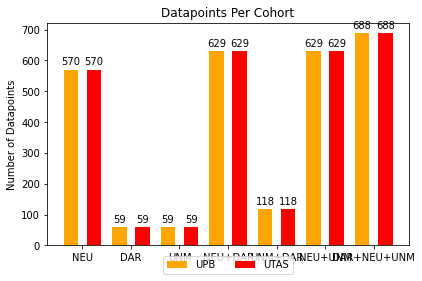

In [29]:
import matplotlib.pyplot as plt
import numpy as np


labels = counts["CohortType"]
UPB = counts["UPB"]
UTAS = counts["UTAS"]

x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars
margin=1.6

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*margin/2, UPB, width, label='UPB', color="orange")
rects2 = ax.bar(x + width*margin/2, UTAS, width, label='UTAS', color="red")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Datapoints')
ax.set_title('Datapoints Per Cohort')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.15), ncol=2)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()



### Seaborn histogram - finalized

Advantages
- Clean
- Simple
- Don't manually add features

Disadvantages

...

<Figure size 7200x7200 with 0 Axes>

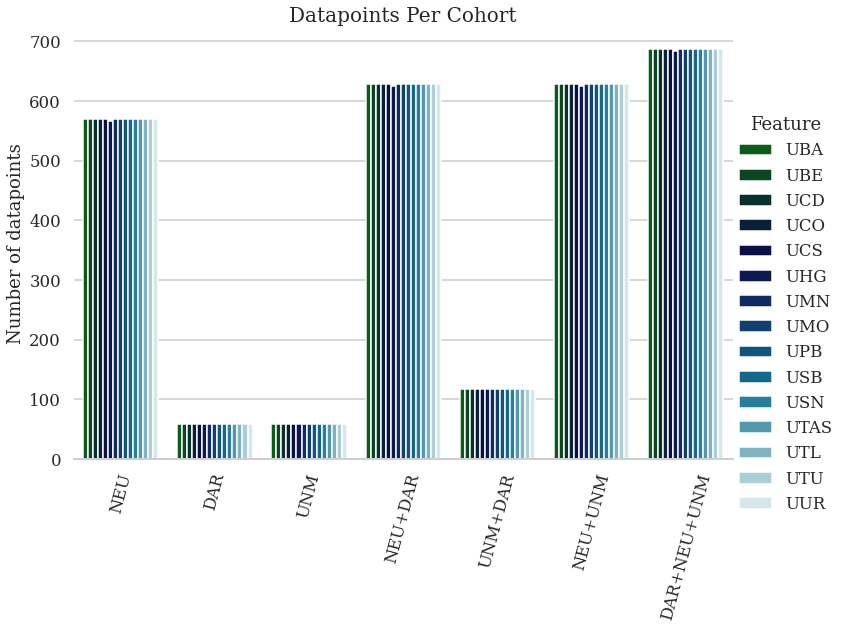

In [30]:
import seaborn as sns
##melting counts for histograms
counts_melted=pd.melt(counts, id_vars = ['CohortType'])

sns.set_theme(style="whitegrid")

fig = plt.figure(figsize = (100, 100))
sns.set_context("talk", rc={"font.family":"cursive","font.size":10,"axes.titlesize":20, "axes.ticksize":15,"legend.labelsize":15})   
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})

##explore - rotate labels, find cool stuff, so much to learn, funnnnn
##puts all features in automaticlly, dont need to explicty say features
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=counts_melted, kind="bar",
    x="CohortType", y="value", hue="variable",
    ci="sd", palette="ocean", alpha=1, height=7, aspect=1.5, legend_out=True
)
g.despine(left=True)
g.set_axis_labels("", "Number of datapoints")
g.legend.set_title("Feature")
g.set_xticklabels(rotation=75)
g.set(title='Datapoints Per Cohort')



In [31]:
# 3) TODO: Generate boxplot data to visualize individual and combinations of data

import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

##creating dataframe - need to melt eaach combination of df, and then put them into one df
##for below boxplot

neu_ints_melt = pd.melt(neu_intersected_cols.drop('PIN_Patient', axis = 1), id_vars="CohortType")
unm_ints_melt = pd.melt(unm_intersected_cols.drop('PIN_Patient', axis = 1), id_vars="CohortType")
dar_ints_melt=pd.melt(dar_intersected_cols.drop('PIN_Patient', axis = 1), id_vars="CohortType")


neu_dar_vert_stack = pd.concat([neu_ints_melt, dar_ints_melt], axis=0)
neu_dar_vert_stack["CohortType"]="NEU+DAR"

unm_dar_vert_stack = pd.concat([unm_ints_melt, dar_ints_melt], axis=0)
unm_dar_vert_stack["CohortType"]="UNM+DAR"

neu_unm_vert_stack = pd.concat([unm_ints_melt, neu_ints_melt], axis=0)
neu_unm_vert_stack["CohortType"]="NEU+UNM"

neu_unm_dar_vert_stack = pd.concat([neu_dar_vert_stack, unm_ints_melt], axis=0)
neu_unm_dar_vert_stack["CohortType"]="NEU+UNM+DAR"
all_combined_stacks_melts=pd.concat([neu_ints_melt,unm_ints_melt,dar_ints_melt,
                                     neu_dar_vert_stack,unm_dar_vert_stack,neu_unm_vert_stack,
                                     neu_unm_dar_vert_stack], axis=0)

print("Column values: ", all_combined_stacks_melts.columns)
print("Cohort values: ", all_combined_stacks_melts["CohortType"].unique())
print(all_combined_stacks_melts[all_combined_stacks_melts["CohortType"]=="NEU"].count()[0],"=", neu_size*len(intersec_3_cohs))
print(all_combined_stacks_melts[all_combined_stacks_melts["CohortType"]=="DAR"].count()[0],"=", dar_size*len(intersec_3_cohs))
print(all_combined_stacks_melts[all_combined_stacks_melts["CohortType"]=="UNM"].count()[0],"=", unm_size*len(intersec_3_cohs))

print(all_combined_stacks_melts[all_combined_stacks_melts["CohortType"]=="NEU+DAR"].count()[0],"=", (neu_size+dar_size)*len(intersec_3_cohs))
print(all_combined_stacks_melts[all_combined_stacks_melts["CohortType"]=="UNM+DAR"].count()[0],"=", (dar_size+unm_size)*len(intersec_3_cohs))
print(all_combined_stacks_melts[all_combined_stacks_melts["CohortType"]=="NEU+UNM"].count()[0],"=", (unm_size+neu_size)*len(intersec_3_cohs))

print(all_combined_stacks_melts[all_combined_stacks_melts["CohortType"]=="NEU+UNM+DAR"].count()[0],"=", (dar_size+unm_size+neu_size)*len(intersec_3_cohs
                                                                                                                                        ))



Column values:  Index(['CohortType', 'variable', 'value', 'Analyte'], dtype='object')
Cohort values:  ['NEU' 'UNM' 'DAR' 'NEU+DAR' 'UNM+DAR' 'NEU+UNM' 'NEU+UNM+DAR']
8550 = 8550
885 = 885
885 = 885
9435 = 9435
1770 = 1770
9435 = 9435
10320 = 10320


In [32]:
all_combined_stacks_melts
#something is wrong here - variable and Analyte get mixed up

,CohortType,variable,value,Analyte
0,NEU,UBA,3.108000,NaN
1,NEU,UBA,2.373000,NaN
2,NEU,UBA,1.611000,NaN
3,NEU,UBA,12.049000,NaN
4,NEU,UBA,1.516000,NaN
...,...,...,...,...
880,NEU+UNM+DAR,NaN,0.139608,UUR
881,NEU+UNM+DAR,NaN,2.141090,UUR
882,NEU+UNM+DAR,NaN,0.610903,UUR
883,NEU+UNM+DAR,NaN,1.088817,UUR


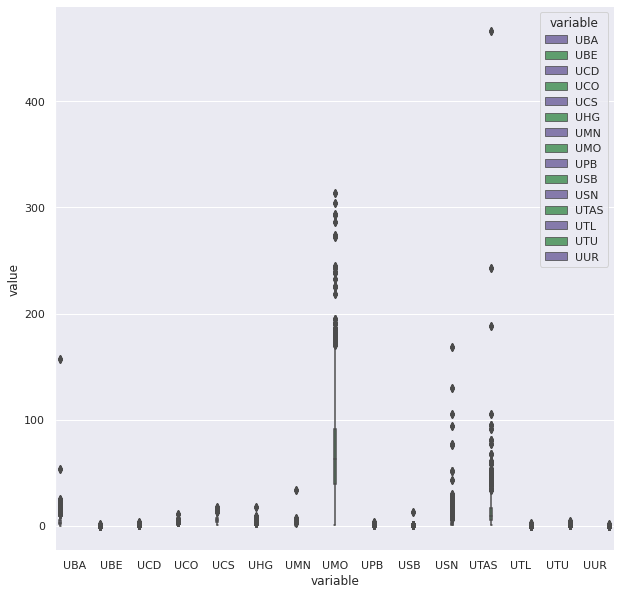

In [41]:
##creating the boxplots
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(10,10)})

# Load the example tips dataset

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="variable", y="value",
            hue="variable", palette=["m", "g"],
            data=all_combined_stacks_melts)
sns.despine(offset=1, trim=True)


In [52]:
all_combined_stacks_melts[all_combined_stacks_melts['CohortType'].isin(['NEU','UNM','DAR'])]

,CohortType,variable,value,Analyte
0,NEU,UBA,3.108000,NaN
1,NEU,UBA,2.373000,NaN
2,NEU,UBA,1.611000,NaN
3,NEU,UBA,12.049000,NaN
4,NEU,UBA,1.516000,NaN
...,...,...,...,...
880,DAR,NaN,0.139608,UUR
881,DAR,NaN,2.141090,UUR
882,DAR,NaN,0.610903,UUR
883,DAR,NaN,1.088817,UUR


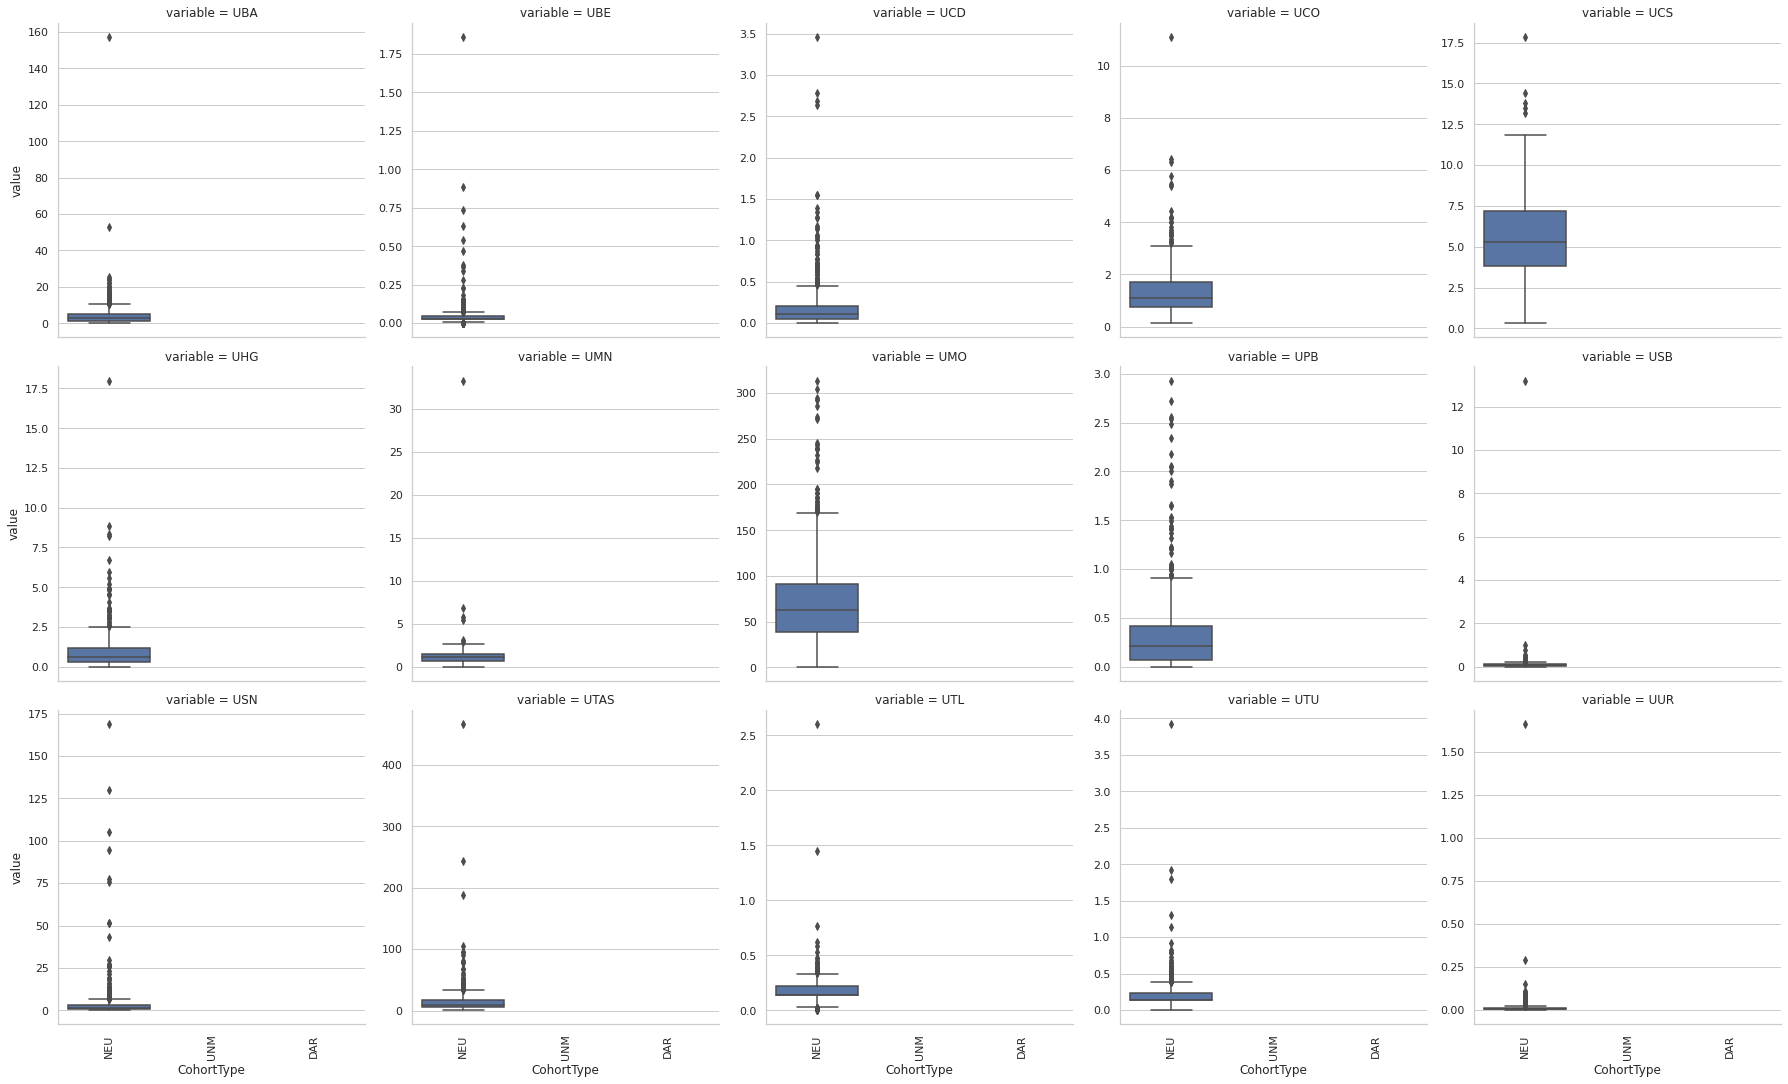

In [54]:
sns.set_style('whitegrid')

plot_df = all_combined_stacks_melts[all_combined_stacks_melts['CohortType'].isin(['NEU','UNM','DAR'])]
g = sns.catplot(
    data=plot_df,
    x='CohortType', y='value',
    col='variable', kind='box', col_wrap=5, sharey = False,
)

# set rotation
g.set_xticklabels(rotation=90)

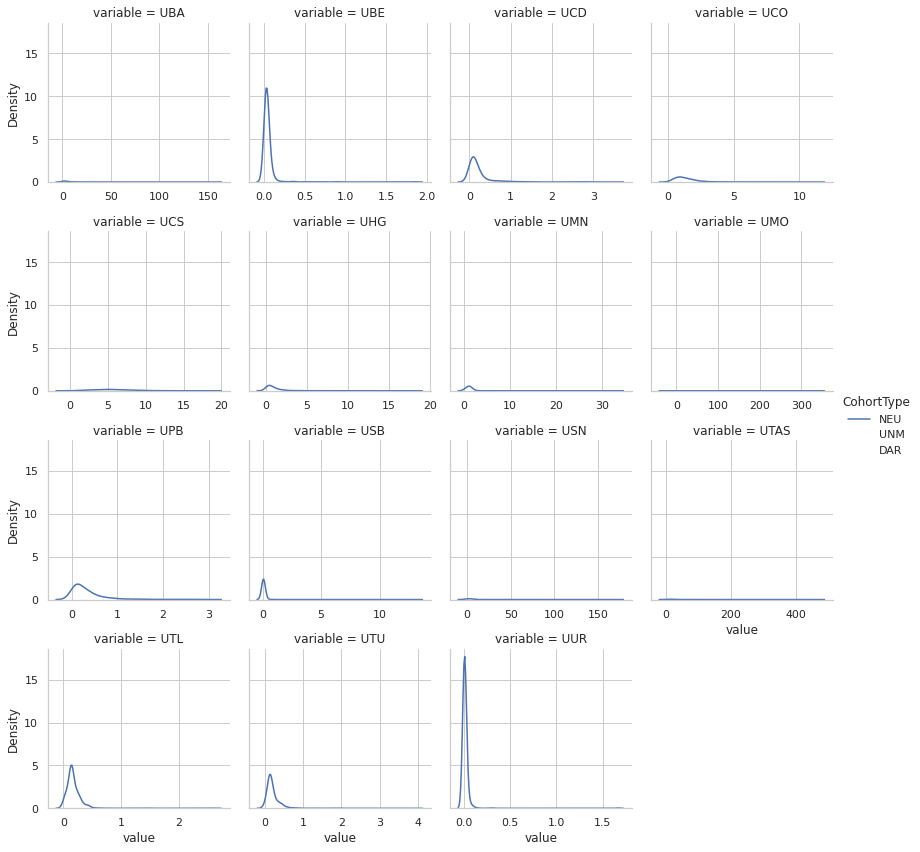

In [60]:
# since this might be a comparison study, we don't need to add the distributions of two or more chorts. just do:

g = sns.FacetGrid(plot_df, col='variable', hue='CohortType', col_wrap = 4, sharex = False)
p1 = g.map(sns.kdeplot, 'value').add_legend()


In [45]:
g?

All UTAS variables Only

Text(0.5, 1.0, 'UTAS Values Per Cohort')

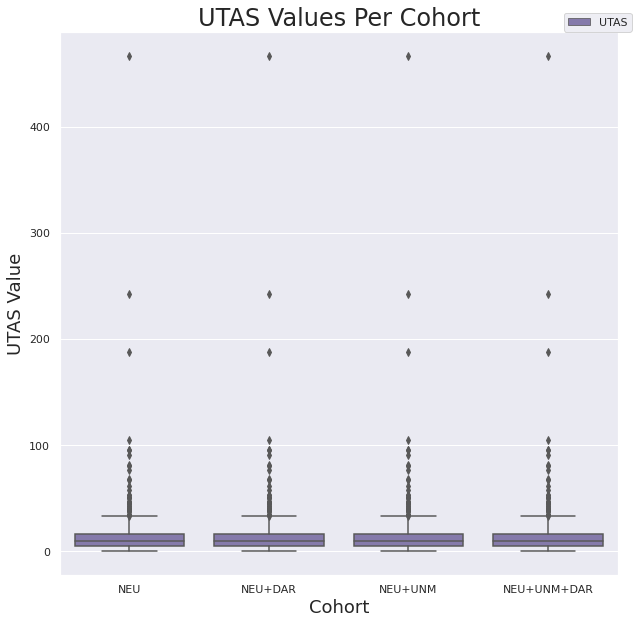

In [36]:
##ZLATAN -  can you help me create a facet grid with boxplots of each feature

##boxplot of UTAS variables less than 100 to see it better
all_combined_UTAS=all_combined_stacks_melts[all_combined_stacks_melts["variable"]=="UTAS"]
##creating the boxplots
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(10,10)})

# Load the example tips dataset

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="CohortType", y="value",
            hue="variable", palette=["m"],
            data=all_combined_UTAS)

plt.legend(loc=(0.903,1))
plt.xlabel("Cohort", size=18)
plt.ylabel("UTAS Value", size=18)
plt.title("UTAS Values Per Cohort", size=24)

All UPB

In [39]:
# 4) TODO: Generate a visualization also where you overlay the three density plots for each cohort over each other
# If you can add vertical lines in the distribution plot to show the mean.


#example:
#https://stackoverflow.com/questions/41144357/showing-the-mean-line-in-a-density-plot-in-pandas

<AxesSubplot:>

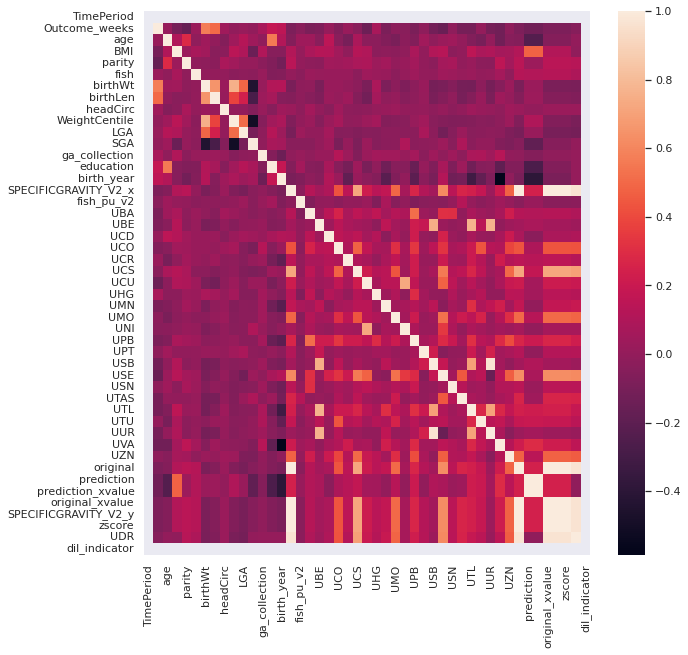

In [47]:
# 5) TODO: Correlate the 15 harmonized urine values but write your own correlation functions and visualizaions. 
##heatmap of correlation in each cohort 
import seaborn as sns
# Generate correlations for datasets:
# NEU
# DAR
# UNM
# NEU-DAR
# DAR-NEU
# DAR-UNM
# DAR-NEU-UNM


sns.heatmap(neu_df.corr())



In [49]:
neu_df.corr()

,TimePeriod,Outcome_weeks,age,BMI,parity,fish,birthWt,birthLen,headCirc,WeightCentile,...,UVA,UZN,original,prediction,prediction_xvalue,original_xvalue,SPECIFICGRAVITY_V2_y,zscore,UDR,dil_indicator
TimePeriod,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outcome_weeks,NaN,1.000000,0.014692,-0.102446,-0.168328,0.026236,0.568850,0.498724,0.044781,-0.003450,...,-0.123899,-0.015759,-0.081278,-0.121284,-0.121284,-0.081278,-0.081278,-0.081278,-0.048649,NaN
age,NaN,0.014692,1.000000,0.107422,0.284436,-0.010925,0.043804,-0.008535,-0.053847,0.045866,...,-0.125056,-0.042897,-0.056840,-0.235551,-0.235551,-0.056840,-0.056840,-0.056840,0.000218,NaN
BMI,NaN,-0.102446,0.107422,1.000000,0.029958,0.075116,0.047753,-0.034661,-0.029815,0.144245,...,0.063494,0.068494,0.114402,0.474093,0.474093,0.114402,0.114402,0.114402,-0.013205,NaN
parity,NaN,-0.168328,0.284436,0.029958,1.000000,-0.013451,-0.016471,-0.028863,0.078025,0.051834,...,0.156795,0.057384,0.143073,0.033186,0.033186,0.143073,0.143073,0.143073,0.132979,NaN
fish,NaN,0.026236,-0.010925,0.075116,-0.013451,1.000000,-0.006751,-0.001844,0.000176,-0.031527,...,0.060795,-0.010996,0.120659,0.110408,0.110408,0.120659,0.120659,0.120659,0.090679,NaN
birthWt,NaN,0.568850,0.043804,0.047753,-0.016471,-0.006751,1.000000,0.648400,0.023929,0.758290,...,-0.050532,0.027479,-0.084820,0.026950,0.026950,-0.084820,-0.084820,-0.084820,-0.092751,NaN
birthLen,NaN,0.498724,-0.008535,-0.034661,-0.028863,-0.001844,0.648400,1.000000,0.013157,0.376601,...,0.034707,0.007550,-0.058342,0.031822,0.031822,-0.058342,-0.058342,-0.058342,-0.066900,NaN
headCirc,NaN,0.044781,-0.053847,-0.029815,0.078025,0.000176,0.023929,0.013157,1.000000,-0.001240,...,-0.013821,0.042079,0.025734,-0.000634,-0.000634,0.025734,0.025734,0.025734,0.025815,NaN
WeightCentile,NaN,-0.003450,0.045866,0.144245,0.051834,-0.031527,0.758290,0.376601,-0.001240,1.000000,...,-0.017583,0.027897,-0.061827,0.101879,0.101879,-0.061827,-0.061827,-0.061827,-0.090902,NaN


In [ ]:

# 6) TODO: Can you write about what you see. Are there any cohorts that are similar with the harmonized data? 
# Are there any analytes that are particularliy higher lower in specific cohorts.


### 7) TODO: Think about if how we could compare similarity between two cohorts?

- Look at the shape of the distributions
- Look at peak of distributions (mode)
- Look at median and compare to dashed line (mean)
